# Developing a Mock Dataset for an Educational Recommender System in PyTorch

In this tutorial, we will create a mock dataset suitable for developing an educational recommender system using PyTorch, focusing on content suggestion based on student interactions and performance.

## Dataset Overview

Our dataset will represent student interactions with various educational content, influenced by different learner profiles. The aim is to simulate realistic engagement and performance metrics.

## Learner Profiles and Content Types

### Learner Profiles:

1. **Visual and Auditory Learners**: Prefer audio-visual content like Instructional Videos and Audio Lectures.
2. **Textual and Analytical Learners**: Favor written materials such as Lecture Notes and enjoy engaging with Examples and Analogies.
3. **Interactive Learners**: Engage more with interactive content like Educational Games.
4. **Synthesizers**: Prefer consolidating knowledge through Infographics and Visual Aids.

### Educational Content Types:
- Instructional Videos
- Lecture Notes
- Educational Games
- Audio Lectures
- Infographics and Visual Aids
- Examples and Analogies

## Dataset Elements

1. **StudentID**: Identifier for each student.
2. **TopicID**: Topic being studied.
3. **ContentID**: Identifier for educational content.
4. **Content Type**: Category of content (e.g., video, notes).
5. **Interaction Status**: Binary indicator of interaction.
6. **Interaction Duration**: Time spent on content (if interacted).
7. **Topic Performance Score**: Performance score for the topic.

> **Note** The **Learner Profile** will also be stored as a way to validate that the trained model provides logical suggestions.

## Generating Mock Data

In [1]:
import pandas as pd
import numpy as np
import random

num_students = 500
num_topics = 30
num_content_types = 6

def assign_learner_profile():
    profiles = ['Visual and Auditory Learners', 'Textual and Analytical Learners', 
                'Interactive Learners', 'Synthesizers']
    return random.choice(profiles)

def get_content_type(content_id, num_content_types=6):
    content_types = ['Instructional Videos', 'Lecture Notes', 'Educational Games', 
                     'Audio Lectures', 'Infographics and Visual Aids', 'Examples and Analogies']
    # Ensuring a consistent mapping of content ID to content type
    return content_types[content_id % num_content_types]

# Function to simulate interaction status
def simulate_interaction_status(profile, content_type):
    # Define probabilities for each profile and content type
    interaction_probability = {
        'Visual and Auditory Learners': {
            'Instructional Videos': 0.8, 'Audio Lectures': 0.7, 
            'Lecture Notes': 0.4, 'Educational Games': 0.5, 
            'Infographics and Visual Aids': 0.6, 'Examples and Analogies': 0.5
        },
        'Textual and Analytical Learners': {
            'Instructional Videos': 0.4, 'Audio Lectures': 0.4, 
            'Lecture Notes': 0.75, 'Educational Games': 0.5, 
            'Infographics and Visual Aids': 0.6, 'Examples and Analogies': 0.65
        },
        'Interactive Learners': {
            'Instructional Videos': 0.5, 'Audio Lectures': 0.4, 
            'Lecture Notes': 0.4, 'Educational Games': 0.8, 
            'Infographics and Visual Aids': 0.55, 'Examples and Analogies': 0.5
        },
        'Synthesizers': {
            'Instructional Videos': 0.55, 'Audio Lectures': 0.5, 
            'Lecture Notes': 0.5, 'Educational Games': 0.45, 
            'Infographics and Visual Aids': 0.7, 'Examples and Analogies': 0.6
        }
    }

    # Retrieve the interaction probability for the given profile and content type
    prob = interaction_probability[profile][content_type]

    # Determine interaction status based on probability
    return 1 if random.random() < prob else 0

def simulate_interaction_duration(profile, content_type, interaction_status):

    # Base average interaction durations (in minutes) for each content type
    base_durations = {
        'Instructional Videos': 30,
        'Audio Lectures': 25,
        'Lecture Notes': 20,
        'Educational Games': 35,
        'Infographics and Visual Aids': 15,
        'Examples and Analogies': 20
    }

    # No interaction, hence no duration
    if interaction_status == 0:
        return 0, base_durations

    # Profile-specific adjustments to base durations for each content type
    # Each learners adjustments add to 3
    duration_adjustments = {
        'Visual and Auditory Learners': {
            'Instructional Videos': 1.4, 'Audio Lectures': 1.3, 'Lecture Notes': 0.6, 
            'Educational Games': 0.7, 'Infographics and Visual Aids': 1.3, 'Examples and Analogies': 0.7
        },
        'Textual and Analytical Learners': {
            'Instructional Videos': 0.6, 'Audio Lectures': 0.7, 'Lecture Notes': 1.4, 
            'Educational Games': 0.9, 'Infographics and Visual Aids': 1.1, 'Examples and Analogies': 1.3
        },
        'Interactive Learners': {
            'Instructional Videos': 1.2, 'Audio Lectures': 1.1, 'Lecture Notes': 0.5, 
            'Educational Games': 1.5, 'Infographics and Visual Aids': 0.8, 'Examples and Analogies': 0.9
        },
        'Synthesizers': {
            'Instructional Videos': 1.1, 'Audio Lectures': 0.8, 'Lecture Notes': 0.5, 
            'Educational Games': 1.2, 'Infographics and Visual Aids': 1.5, 'Examples and Analogies': 0.9
        }
    }

    # Get the adjusted duration for the profile and content type
    adjusted_duration = base_durations[content_type] * duration_adjustments[profile][content_type]

    # Simulate a realistic interaction duration by adding some variability
    interaction_duration = np.random.normal(adjusted_duration, 5)  # 5 minutes standard deviation

    # Ensuring duration is between 5 and 60 minutes
    return max(5, min(interaction_duration, 60)), base_durations 


def determine_topic_proficiency(profile, content_info, base_durations):
    # Define weights for each profile and content type
    # The weights for each profile sum up to 1
    content_weight = {
        'Visual and Auditory Learners': {
            'Instructional Videos': 0.4, 'Audio Lectures': 0.30,
            'Lecture Notes': 0.05, 'Educational Games': 0.05,
            'Infographics and Visual Aids': 0.10, 'Examples and Analogies': 0.10
        },
        'Textual and Analytical Learners': {
            'Instructional Videos': 0.05, 'Audio Lectures': 0.10,
            'Lecture Notes': 0.45, 'Educational Games': 0.10,
            'Infographics and Visual Aids': 0.10, 'Examples and Analogies': 0.20
        },
        'Interactive Learners': {
            'Instructional Videos': 0.15, 'Audio Lectures': 0.10,
            'Lecture Notes': 0.05, 'Educational Games': 0.5,
            'Infographics and Visual Aids': 0.10, 'Examples and Analogies': 0.10
        },
        'Synthesizers': {
            'Instructional Videos': 0.15, 'Audio Lectures': 0.10,
            'Lecture Notes': 0.05, 'Educational Games': 0.10,
            'Infographics and Visual Aids': 0.50, 'Examples and Analogies': 0.10
        }
    }
    
    # Initialize proficiency score
    proficiency_score = 0

    # Loop through each content interaction
    for content in content_info:
        content_type = content['content_type']
        status = content['interaction_status']
        duration = content['interaction_duration']

        # Get the weight for the content type based on the learner profile
        weight = content_weight[profile][content_type]

        base_duration = base_durations[content_type]

        # Calculate score contribution from this content
        # by first normalizing the duration by the average duration of this content type
        score_contribution = weight * status * duration/base_duration

        # Update total proficiency score
        proficiency_score += score_contribution

    return min(proficiency_score, 1)  # Cap the proficiency score at 1

def calculate_performance_score(proficiency_score):
    # Base performance score influenced by proficiency
    base_performance = proficiency_score * 100

    # Adding variability to the performance score
    # The variability can be adjusted to represent the range of possible scores
    performance_variability = 10  # A standard deviation of 10 points

    # Generating a random performance score around the base performance
    performance_score = np.random.normal(base_performance, performance_variability)

    # Ensuring the score is within the range of 0 to 100
    return max(0, min(performance_score, 100))


# Generating the dataset
data = []
for student_id in range(1, num_students+1):
    profile = assign_learner_profile()
    for topic_id in range(1, num_topics+1):
        content_info = []
        for content_id in range(1, num_content_types + 1):
            content_id = content_id + (topic_id-1)*num_content_types
            content_type = get_content_type(content_id)
            interaction_status = simulate_interaction_status(profile, content_type)
            interaction_duration, base_durations = simulate_interaction_duration(profile, content_type, interaction_status)

            # Store content interaction data
            content_info.append({
                'content_id': content_id,
                'content_type': content_type,
                'interaction_status': interaction_status,
                'interaction_duration': interaction_duration
            })

        # Determine proficiency for the topic based on interactions
        proficiency_score = determine_topic_proficiency(profile, content_info, base_durations)

        # Determine the overall performance score for the topic
        topic_performance_score = calculate_performance_score(proficiency_score)

        # Store the data for each content item within a topic
        for content in content_info:
            data.append({
                'StudentID': student_id,
                'LearnerProfile': profile,
                'TopicID': topic_id,
                'ContentID': content['content_id'],
                'ContentType': content['content_type'],
                'InteractionStatus': content['interaction_status'],
                'InteractionDuration': content['interaction_duration'],
                'TopicPerformanceScore': topic_performance_score,
            })

# Convert to DataFrame
df = pd.DataFrame(data)
df

,StudentID,LearnerProfile,TopicID,ContentID,ContentType,InteractionStatus,InteractionDuration,TopicPerformanceScore
0,1,Synthesizers,1,1,Lecture Notes,0,0.000000,92.531156
1,1,Synthesizers,1,2,Educational Games,0,0.000000,92.531156
2,1,Synthesizers,1,3,Audio Lectures,1,18.181458,92.531156
3,1,Synthesizers,1,4,Infographics and Visual Aids,1,23.665718,92.531156
4,1,Synthesizers,1,5,Examples and Analogies,1,17.906003,92.531156
...,...,...,...,...,...,...,...,...
89995,500,Visual and Auditory Learners,30,176,Educational Games,1,17.905029,95.591516
89996,500,Visual and Auditory Learners,30,177,Audio Lectures,0,0.000000,95.591516
89997,500,Visual and Auditory Learners,30,178,Infographics and Visual Aids,1,23.738050,95.591516
89998,500,Visual and Auditory Learners,30,179,Examples and Analogies,1,15.367639,95.591516


### Saving the Dataset

The generated dataset is saved as a CSV file, which can be used for training and evaluating the recommender system.

In [2]:
# Save the DataFrame as a CSV file
csv_file = 'data/content_recommender_data.csv'
df.to_csv(csv_file, index=False)

### Conclusion

This dataset simulates realistic student interactions with educational content, considering various learner profiles and content types. It's designed to train and evaluate a recommender system in PyTorch, focusing on dynamic content suggestion based on student preferences, historical interactions, and performance.

## Testing

Some simple plotting to test that the functions are logical:

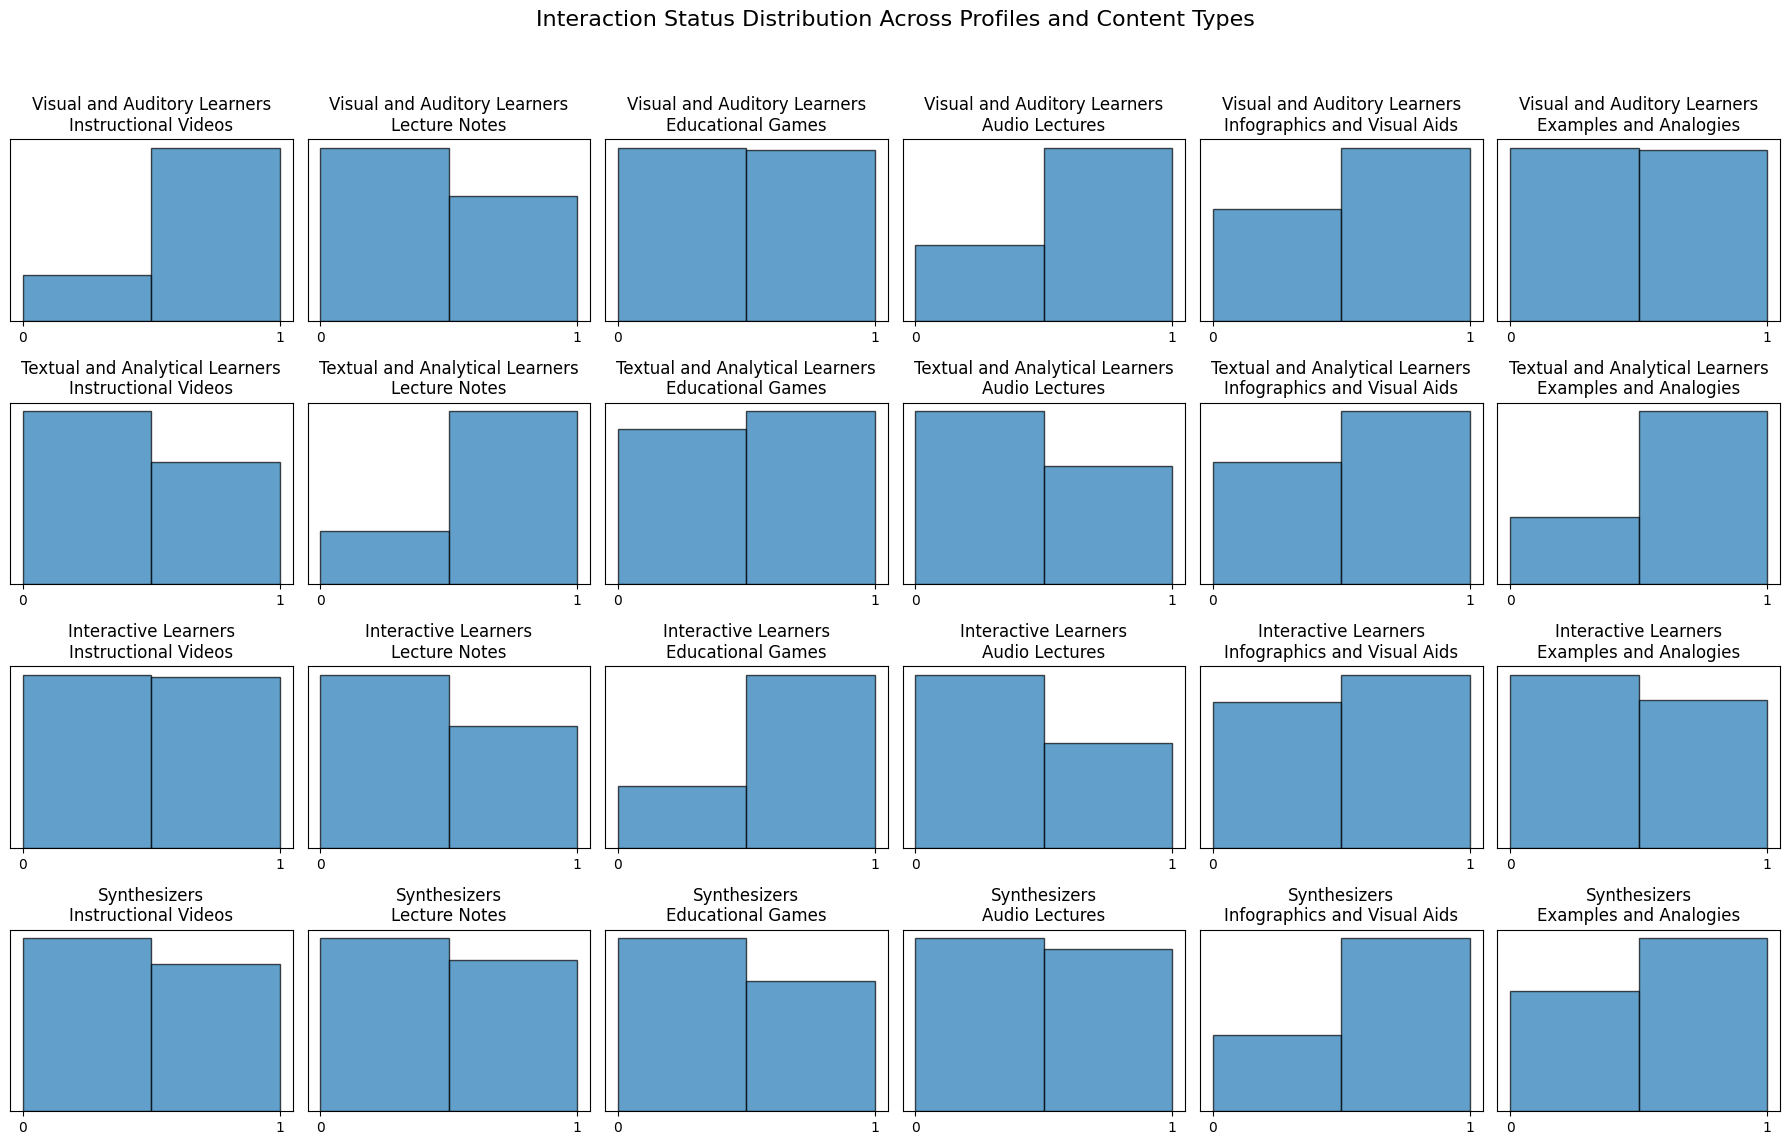

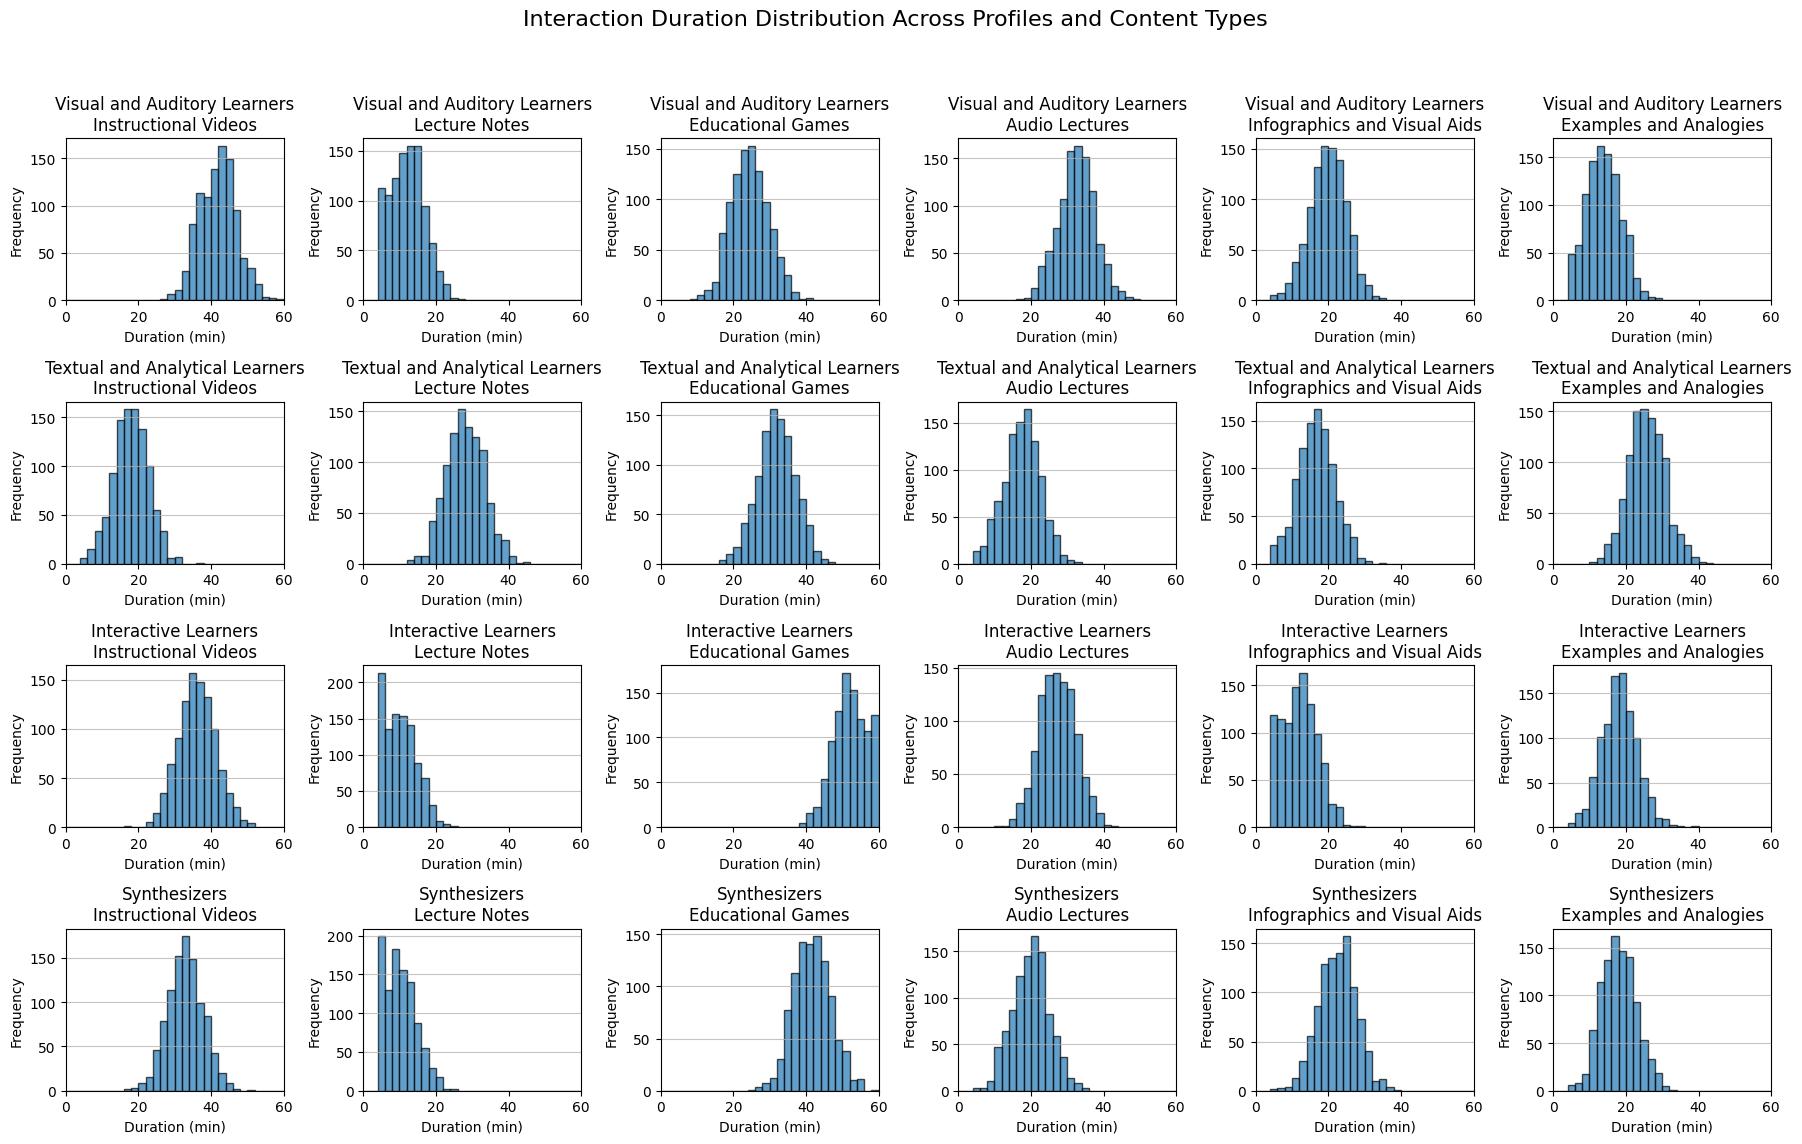

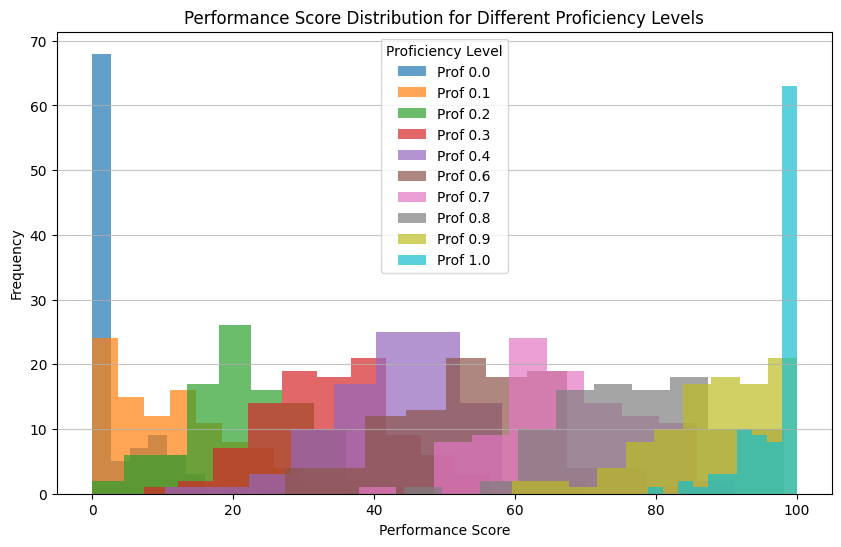

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Test the simulate_interaction_status function
interaction_counts = {
    profile: {content_type: [] for content_type in ['Instructional Videos', 'Lecture Notes', 'Educational Games', 
                                                    'Audio Lectures', 'Infographics and Visual Aids', 'Examples and Analogies']}
    for profile in ['Visual and Auditory Learners', 'Textual and Analytical Learners', 
                    'Interactive Learners', 'Synthesizers']
}

# Simulate interactions
for _ in range(300):  # Number of simulations
    for profile in interaction_counts:
        for content_type in interaction_counts[profile]:
            status = simulate_interaction_status(profile, content_type)
            interaction_counts[profile][content_type].append(status)

# Plotting Interaction Status Distribution for each profile and content type
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 12))
fig.suptitle('Interaction Status Distribution Across Profiles and Content Types', fontsize=16)

for i, profile in enumerate(interaction_counts):
    for j, content_type in enumerate(interaction_counts[profile]):
        ax = axes[i, j]
        ax.hist(interaction_counts[profile][content_type], bins=2, edgecolor='black', alpha=0.7)
        ax.set_title(f'{profile}\n{content_type}')
        ax.set_xticks([0, 1])
        ax.set_yticks([])
        ax.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Initialize a dictionary to store interaction durations for different profiles and content types
interaction_durations = {
    profile: {content_type: [] for content_type in ['Instructional Videos', 'Lecture Notes', 'Educational Games', 
                                                    'Audio Lectures', 'Infographics and Visual Aids', 'Examples and Analogies']}
    for profile in ['Visual and Auditory Learners', 'Textual and Analytical Learners', 
                    'Interactive Learners', 'Synthesizers']
}

# Simulate interaction durations
for _ in range(1000):  # Number of simulations
    for profile in interaction_durations:
        for content_type in interaction_durations[profile]:
            status = 1  # Assuming interaction happened
            duration,_ = simulate_interaction_duration(profile, content_type, status)
            interaction_durations[profile][content_type].append(duration)

# Plotting Interaction Duration Distribution for each profile and content type
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 12))
fig.suptitle('Interaction Duration Distribution Across Profiles and Content Types', fontsize=16)

for i, profile in enumerate(interaction_durations):
    for j, content_type in enumerate(interaction_durations[profile]):
        ax = axes[i, j]
        ax.hist(interaction_durations[profile][content_type], bins=30, range=[0,60], edgecolor='black', alpha=0.7)
        ax.set_title(f'{profile}\n{content_type}')
        ax.set_xlabel('Duration (min)')
        ax.set_ylabel('Frequency')
        ax.set_xlim(0,60)
        ax.grid(axis='y', alpha=0.75)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Testing performance score distribution across a range of proficiency levels
proficiency_levels = np.linspace(0, 1, 10)  # Proficiency levels from 0 to 1
performance_scores = {prof: [] for prof in proficiency_levels}

# Simulate performance scores for each proficiency level
for prof in proficiency_levels:
    for _ in range(100):  # Number of simulations per proficiency level
        performance_scores[prof].append(calculate_performance_score(prof))

# Plotting Performance Score Distribution
plt.figure(figsize=(10, 6))
for prof in proficiency_levels:
    plt.hist(performance_scores[prof], bins=10, alpha=0.7, label=f'Prof {prof:.1f}')

plt.title('Performance Score Distribution for Different Proficiency Levels')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.legend(title='Proficiency Level')
plt.grid(axis='y', alpha=0.75)
plt.show()